In [22]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt



In [10]:
df = pd.read_csv("results/Output/results.csv")


  Protein Name     accCF   accCFHelices   accCFSheets   accCFCoils    accGor  \
0        5LOSA  0.593220       0.634146      0.000000     0.500000  0.805085   
1        5LSFA  0.370370       0.125000      0.000000     0.630435  0.563786   
2        5ZYUA  0.409449       0.233010      0.204545     0.663551  0.503937   
3        6AR0A  0.264286       0.000000      0.000000     0.500000  0.521429   
4        6EK7A  0.546341       0.459627      0.000000     0.863636  0.458537   
5        6EXPC  0.211538       0.380952      0.000000     0.400000  0.423077   
6        6HCPB  0.277620       0.407895      0.008547     0.580645  0.434844   

    accGorHelices   accGorSheets   accGorCoils  
0        0.743902       0.000000      0.944444  
1        0.083333       0.604938      0.623188  
2        0.456311       0.431818      0.579439  
3        0.000000       0.363636      0.662162  
4        0.481366       0.000000      0.375000  
5        1.000000       0.104167      0.514286  
6        0.28947

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


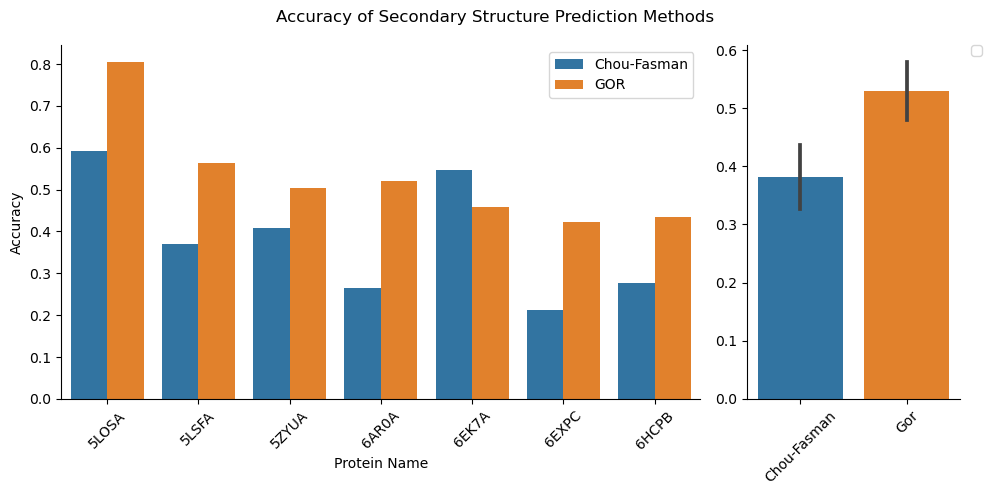

In [99]:
dfm = df[["Protein Name", " accCF", " accGor"]]
dfm = dfm.melt(id_vars = "Protein Name", var_name = "TypePred", value_name = "Accuracy")
sb.color_palette("colorblind")

fig, ax = plt.subplots(1, 2, figsize = (10, 5),gridspec_kw={'width_ratios': [3, 1]})

sb.barplot(data = dfm, x= "Protein Name", y = "Accuracy", hue = "TypePred", ax = ax[0], capsize = 5)

dfm = df[["Protein Name", " accCF", " accGor"]]
sb.barplot(data = dfm, errorbar = "se" )
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.xlabel("Protein")
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['Chou-Fasman', 'GOR'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='center')
ax[1].set_xticklabels(["Chou-Fasman", "Gor"], rotation=45, ha='center')
ax[1].set_xlabel("")

plt.suptitle("Accuracy of Secondary Structure Prediction Methods")
plt.tight_layout()
plt.show()
